In [ ]:
#挂载云盘 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#进入项目目录
print('original document')
!ls
import os
os.chdir('/content/drive/My Drive/colab/2020年C题')
print('current document')
!ls

original document
 2020年C题--面向康复工程的脑电信号分析和判别模型.docx
'~$20年C题--面向康复工程的脑电信号分析和判别模型.docx'
 C-1-加叠加.ipynb
 c2_2.xlsx
 C-4-2.ipynb
 data.rar
 lstm-classification
 Multi-Class-Classification
 unrar.ipynb
 VAE-TensorFlow-master
 附件1-P300脑机接口数据
 附件2-睡眠脑电数据.xlsx
current document
 2020年C题--面向康复工程的脑电信号分析和判别模型.docx
'~$20年C题--面向康复工程的脑电信号分析和判别模型.docx'
 C-1-加叠加.ipynb
 c2_2.xlsx
 C-4-2.ipynb
 data.rar
 lstm-classification
 Multi-Class-Classification
 unrar.ipynb
 VAE-TensorFlow-master
 附件1-P300脑机接口数据
 附件2-睡眠脑电数据.xlsx


In [ ]:
#设置参数
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_path='附件2-睡眠脑电数据.xlsx'
window_len=20
sample_num=20

In [ ]:
from scipy import stats #scipy中的stats可以做统计推断
def data_preprocessing(data_cut):
  data_cut=(data_cut-data_cut.min())/(data_cut.max()-data_cut.min())
  mu = np.mean(data_cut*data_cut, axis=0) #axis=0，那么输出矩阵是1行，求每一列的平均；axis=1，输出矩阵是1列，求每一行的平均
  #sigma = np.std(data_cut, axis=0) #求标准差，这里除的是N
  #skew = stats.skew(data_cut,axis=0) #求偏度
  #kurtosis = stats.kurtosis(data_cut) #求峰度 
  #quantile=data_cut.quantile(q=0.5,axis=0)
  #skew=data_cut.skew(axis=0)
  #mean_column=data_cut.mean(axis=0)
  #record.append(mu)
  return mu
def sample_data(data,window_len,sample_num):
  sample_set=range(len(data)-window_len)
  random_indices = np.random.choice(sample_set, sample_num, replace = False)
  inst_label=data.iloc[0,0]
  data=data.iloc[:,1:5]
  data=data.values
  feature_collection=[]
  label_collection=[]
  for i in random_indices:
    inst_feature=data_preprocessing(data[i:i+window_len,:])
    feature_collection.append(inst_feature)
    label_collection.append(inst_label)
  return np.array(feature_collection),np.array(label_collection)
def sample_data_sum(data_path,window_len,sample_num):
  feature=[]
  label=[]
  data=pd.read_excel(data_path,0,header=0) 
  feature,label=sample_data(data,window_len,sample_num)
  for i in range(5)[1:]:
    data=pd.read_excel(data_path,i,header=0) 
    feature_collection,label_collection=sample_data(data,window_len,sample_num)
    feature=np.vstack((feature,feature_collection))
    label=np.vstack((label,label_collection))
  label=np.reshape(label, (label.shape[0]*label.shape[1]))
  print(feature.shape,label.shape)
  return feature,label
feature,label=sample_data_sum(data_path,window_len,sample_num)

(100, 4) (100,)


In [ ]:
#! git clone https://github.com/stxupengyu/Multi-Class-Classification
#! git clone https://github.com/stxupengyu/lstm-classification
from sklearn.model_selection import train_test_split
train_data,test_data, train_labels, test_labels = train_test_split(feature,label,
                                                   test_size = 0.1,
                                                   random_state = 0)
from sklearn.model_selection import cross_val_score
X,Y=train_data,train_labels
#输出五折交叉验证的结果
def val_result(model,X,Y):
  accuracy=cross_val_score(model, X, Y, cv=5,scoring='accuracy').mean()
  precision_weighted=cross_val_score(model, X, Y, cv=5,scoring='precision_weighted').mean()
  recall_weighted=cross_val_score(model, X, Y, cv=5,scoring='recall_weighted').mean()
  f1_weighted=cross_val_score(model, X, Y, cv=5,scoring='f1_weighted').mean()
  print('accuracy')
  print(accuracy)
  print('precision_weighted')
  print(precision_weighted)
  print('recall_weighted')
  print(recall_weighted)
  print('f1_weighted')
  print(f1_weighted)
def result(train_data,train_labels,test_data,test_labels,model):
  model.fit(train_data,train_labels)
  #在验证集上的预测效果
  print("验证集:")
  predict_target2=model.predict(test_data)
  print("预测正确数量,验证集样本量:")
  print(sum(predict_target2 == test_labels),len(test_labels))
  print("精确度等指标：")
  print(metrics.classification_report(test_labels,predict_target2))
  print("混淆矩阵：")
  print(metrics.confusion_matrix(test_labels,predict_target2))
  dataset=pd.DataFrame(metrics.confusion_matrix(test_labels,predict_target2))
  plt.figure(figsize=(5,4))
  sns.heatmap(dataset.iloc[:,:],annot=True,cmap="YlGnBu")
  plt.show()

  print("在验证集上的预测效果:")
  plt.plot(test_labels) 
  plt.plot(predict_target2,'o')
  plt.legend(('y_real','y_predict'))
  plt.title('validation')
  plt.show()

In [ ]:
#随机森林方法
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
val_result(model,X,Y)
#result(train_data,train_labels,test_data,test_labels,model)

accuracy
0.8
precision_weighted
0.8457407407407407
recall_weighted
0.8
f1_weighted
0.7770194003527336


In [ ]:
#使用adaboost分类算法
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=0)
val_result(model,X,Y)
#result(train_data,train_labels,test_data,test_labels,model)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

accuracy
0.47777777777777775
precision_weighted
0.3094753086419753
recall_weighted
0.47777777777777775
f1_weighted
0.36442113442113444


In [ ]:
#knn k近邻分类算法
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
val_result(model,X,Y)
#result(train_data,train_labels,test_data,test_labels,model)

accuracy
0.7
precision_weighted
0.7144708994708994
recall_weighted
0.7
f1_weighted
0.6795895462562129


In [ ]:
# 支持向量机SVM
from sklearn.svm import SVC  
model = SVC(kernel='rbf') 
val_result(model,X,Y)
#result(train_data,train_labels,test_data,test_labels,model)

accuracy
0.6888888888888889
precision_weighted
0.7483333333333333
recall_weighted
0.6888888888888889
f1_weighted
0.6730335097001763


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#线性支持向量机SVM
from sklearn.svm import LinearSVC
model = LinearSVC() 
val_result(model,X,Y)
#result(train_data,train_labels,test_data,test_labels,model)

accuracy
0.6333333333333333
precision_weighted
0.5552116402116403
recall_weighted
0.6333333333333333
f1_weighted
0.5720498637165303


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#使用bagging的集成策略分类 元分类器是KNN
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=7),
                        n_estimators=10, random_state=0)
val_result(model,X,Y)
#result(train_data,train_labels,test_data,test_labels,model)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy
0.6888888888888889
precision_weighted
0.6791269841269841
recall_weighted
0.6888888888888889
f1_weighted
0.6536940836940837


In [ ]:
#使用bagging的集成策略分类 元分类器是logistic
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=LogisticRegression(),
                        n_estimators=10, random_state=0)
val_result(model,X,Y)
#result(train_data,train_labels,test_data,test_labels,model)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

accuracy
0.611111111111111
precision_weighted
0.6206060606060605
recall_weighted
0.611111111111111
f1_weighted
0.5511552028218695


In [ ]:
#神经网络分类方法
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(8, ),random_state=1, max_iter=300)
val_result(model,X,Y)
#result(train_data,train_labels,test_data,test_labels,model)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy
0.5222222222222223
precision_weighted
0.46308641975308645
recall_weighted
0.5222222222222223
f1_weighted
0.45234160900827564


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#使用OneVsRest多分类算法 元分类器是svm
from sklearn.multiclass import OneVsRestClassifier
model = OneVsRestClassifier(SVC())
val_result(model,X,Y)
#result(train_data,train_labels,test_data,test_labels,model)

accuracy
0.6888888888888889
precision_weighted
0.6804232804232805
recall_weighted
0.6888888888888889
f1_weighted
0.6543819143819143


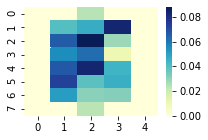

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.read_excel('c2_2.xlsx',header=None)
dataset=pd.read_excel('c2_2.xlsx',header=None)
plt.figure(figsize=(3,2))
sns.heatmap(dataset.iloc[:,:],annot=False,cmap="YlGnBu")
plt.show()